In [1]:
import numpy as np # 
import pandas as pd 
import requests, io 
import glob
from pprint import pprint
import matplotlib.pyplot as plt 
%matplotlib inline

# scikit-learn modules
from sklearn.model_selection import train_test_split 
from sklearn.metrics import mean_squared_error 
from sklearn.ensemble import RandomForestRegressor 
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import StandardScaler
from sklearn.utils import shuffle
class color:
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'

C:\Users\anilo\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
def load_csv():
    csv=glob.glob(r'E:\Havelsan\Datasets\*_sensors.csv')
    df_list = []
    abr_sensor_list = ['E02005', 'E02006', 'E02056', 'E03760', 'G00027', 'G00108', 'G02011', 'N02015', 'P00023', 'P01005', 'P01302', 'P01303', 'P01600', 'P01602', 'P02055', 'P02065', 'P02066', 'P02071', 'P02072', 'Q02004', 'T00002', 'T01010', 'T01011', 'T01350', 'T01351', 'T01601', 'T01603', 'T02014', 'T02040', 'T02041', 'T02042', 'T02044', 'T04600', 'Z00518', 'Z01970', 'Z02013']
    for c in csv:
        df_list.append(pd.read_csv(c, engine='c',usecols=abr_sensor_list,dtype=np.float64))
    result = pd.concat(df_list, axis=0)
    result.dropna(inplace=True)
    result.reset_index(drop=True,inplace=True)
    return result

In [3]:
df = load_csv()

In [4]:
df

,E02005,E02006,E02056,E03760,G00027,G00108,G02011,N02015,P00023,P01005,...,T01603,T02014,T02040,T02041,T02042,T02044,T04600,Z00518,Z01970,Z02013
0,16.7722,432.7310,3647.98,16.5320,3.17834,3.43379,3.17827,74.0099,7.63862,2.15110,...,371.966,325.669,324.319,-1.34235,46.6942,48.6335,234.325,12.9326,14.9730,22.5361
1,16.7722,430.4790,3647.98,16.5320,3.17804,3.43365,3.17797,74.0099,7.63862,2.15192,...,371.966,325.669,324.319,-1.34641,46.6710,48.6335,234.329,12.9326,14.9747,22.5361
2,16.7722,428.2280,3647.98,16.5320,3.17774,3.43352,3.17767,74.0099,7.63878,2.15274,...,371.966,325.669,324.319,-1.35046,46.6477,48.6335,234.333,12.9326,14.9764,22.5361
3,16.7716,427.8040,3647.98,16.5315,3.17747,3.43323,3.17741,74.0096,7.63886,2.15277,...,371.937,325.664,324.310,-1.35320,46.6519,48.6335,234.339,12.9326,14.9774,22.5357
4,16.7710,427.3800,3647.98,16.5309,3.17721,3.43294,3.17714,74.0092,7.63894,2.15279,...,371.909,325.659,324.301,-1.35594,46.6560,48.6335,234.345,12.9326,14.9784,22.5354
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4349881,12.4602,25.1648,2757.11,12.3641,2.87130,3.08811,2.87402,67.0734,7.72496,2.14855,...,471.218,413.021,371.033,-41.97550,57.9392,51.1324,300.477,16.0775,15.7389,31.6045
4349882,12.4691,25.1000,2757.11,12.3815,2.87130,3.08950,2.87441,67.0529,7.72578,2.14846,...,471.361,413.003,371.015,-41.97420,57.9217,51.1321,300.439,16.0790,15.7460,31.6222
4349883,12.4781,25.0352,2757.11,12.3989,2.87130,3.09090,2.87480,67.0323,7.72661,2.14838,...,471.503,412.986,370.997,-41.97280,57.9041,51.1318,300.400,16.0804,15.7530,31.6398
4349884,12.4870,24.9703,2757.11,12.4163,2.87130,3.09229,2.87519,67.0117,7.72743,2.14829,...,471.646,412.968,370.979,-41.97140,57.8865,51.1315,300.361,16.0819,15.7601,31.6574


In [6]:
df_sample = df.sample(n=100000, random_state=1)

In [7]:
df_sample

,E02005,E02006,E02056,E03760,G00027,G00108,G02011,N02015,P00023,P01005,...,T01603,T02014,T02040,T02041,T02042,T02044,T04600,Z00518,Z01970,Z02013
1640929,16.2380,213.1900,2856.31,16.6506,3.43057,3.70024,3.44181,72.2818,7.57186,2.12961,...,386.708,333.172,365.772,32.598600,49.4349,49.4572,245.518,14.4496,16.2131,31.8919
2024683,15.5343,272.7620,3319.60,14.8465,2.88524,3.12959,2.89603,73.8028,7.72228,2.15942,...,359.928,315.294,315.609,0.322540,44.0422,48.1632,225.995,12.8459,15.5458,22.4136
831508,14.0879,275.6840,3132.15,13.8719,2.62731,2.83497,2.62731,73.9989,7.78966,2.15580,...,348.443,305.616,304.080,-1.527170,43.0478,47.9900,220.567,12.8069,12.8416,19.9913
1675248,16.2312,346.6160,3195.68,14.6985,3.21486,3.52765,3.21486,69.4167,7.62793,2.13710,...,376.338,326.891,342.877,15.986500,46.8512,49.0683,237.103,13.5847,15.7114,27.2993
1880580,14.9129,109.8810,3339.81,14.5698,3.34816,3.63381,3.34816,70.9026,7.59121,2.13405,...,454.647,390.611,399.653,9.041920,55.1907,50.3178,284.080,15.4489,17.0226,32.5522
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2285809,10.7742,24.5089,2242.70,10.2364,2.75303,3.00627,2.75615,64.1962,7.76090,2.13728,...,488.576,429.029,457.509,28.438800,58.5539,52.1868,308.388,17.7496,17.4933,40.4230
1281781,12.9547,24.9361,2420.39,13.1273,3.01332,3.23783,3.01332,67.2066,7.69514,2.14256,...,441.560,378.365,409.887,31.522100,55.0017,49.3135,281.969,16.1946,15.9571,38.8598
1872740,16.3411,472.2230,3611.37,16.7034,3.05858,3.35572,3.05858,73.8426,7.69629,2.14811,...,367.884,327.974,326.449,-1.525270,47.1454,48.7198,236.783,13.0007,15.5911,25.5375
3033182,15.2910,285.8300,3375.71,15.4926,2.83196,3.12900,2.84199,74.0335,7.72695,2.15861,...,360.250,314.894,316.000,1.105190,44.0250,48.1529,225.580,12.8309,15.3590,21.1562


In [8]:
x = df_sample.drop('Z02013', axis = 1) # Features
y = df_sample['Z02013']  # Target

In [9]:
def Evolution_Metrics(model,x_test,y_test):
    y_pred = model.predict(x_test)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    print(color.BOLD)
    print('MAE: ',mae)
    print('MSE: ',mse)
    print('RMSE: ',rmse)
    print('R2: ',r2)
    print(color.END)

# Base Model

In [10]:
# Splitting the dataset into training and testing set (80/20)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 28)

In [11]:
# Initializing the Random Forest Regression model with 10 decision trees
model = RandomForestRegressor(n_estimators = 10, random_state = 0)

# Fitting the Random Forest Regression model to the data
model.fit(x_train, y_train) 

RandomForestRegressor(n_estimators=10, random_state=0)

In [12]:
Evolution_Metrics(model,x_test,y_test)


MAE:  0.40388421980000005
MSE:  0.6613043192313651
RMSE:  0.8132061972411211
R2:  0.9721524883300036



# Base Model with Normalized data

In [13]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

In [14]:
# Splitting the dataset into training and testing set (80/20)
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size = 0.2, random_state = 28)

In [15]:
# Initializing the Random Forest Regression model with 10 decision trees
model = RandomForestRegressor(n_estimators = 10, random_state = 0)

# Fitting the Random Forest Regression model to the data
model.fit(x_train, y_train) 

RandomForestRegressor(n_estimators=10, random_state=0)

In [16]:
Evolution_Metrics(model,x_test,y_test)


MAE:  0.4036543114
MSE:  0.6602966404929862
RMSE:  0.8125863895568188
R2:  0.9721949216615433



# Base model with Pca

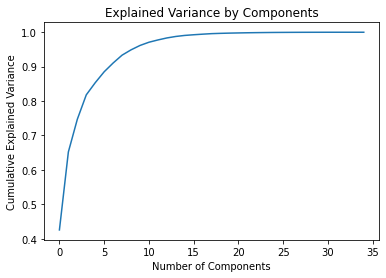

In [17]:
from sklearn.decomposition import PCA
# Normalize data
scaler = StandardScaler()
df_scaled = scaler.fit_transform(x)

# Fit PCA with all components
pca = PCA()
pca.fit(df_scaled)

# Plot cumulative explained variance
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by Components')
plt.show()

In [18]:
for d in range(len(np.cumsum(pca.explained_variance_ratio_))):
    print(str(d)+" "+str(np.cumsum(pca.explained_variance_ratio_)[d]))

0 0.4255472532595904
1 0.6521345982453605
2 0.747055074734142
3 0.8180385462062798
4 0.8533360691134269
5 0.8851054319767155
6 0.9106138844993267
7 0.9334249602923179
8 0.9488425199456787
9 0.9615666962243016
10 0.97096211917343
11 0.9775761005354014
12 0.983408071707099
13 0.9877458306717732
14 0.9907529907688174
15 0.992705758948339
16 0.9944124686685731
17 0.9959345786932311
18 0.9967876120568108
19 0.9974566346086085
20 0.9979911071831413
21 0.9984821575702999
22 0.9988528861225697
23 0.9991442718053165
24 0.9994054785065096
25 0.9995669261201461
26 0.9997124180623959
27 0.999817818616946
28 0.9998884692273837
29 0.999941092802856
30 0.9999803242010797
31 0.9999976471750153
32 0.9999996314232115
33 0.9999999834217658
34 0.9999999999999999


In [19]:
pca = PCA(n_components=19)
X_pca = pca.fit_transform(x)
# Splitting the dataset into training and testing set (80/20)
x_train, x_test, y_train, y_test = train_test_split(X_pca, y, test_size = 0.2, random_state = 28)

In [20]:
# Initializing the Random Forest Regression model with 10 decision trees
model = RandomForestRegressor(n_estimators = 10, random_state = 0)

# Fitting the Random Forest Regression model to the data
model.fit(x_train, y_train) 

RandomForestRegressor(n_estimators=10, random_state=0)

In [21]:
Evolution_Metrics(model,x_test,y_test)


MAE:  0.54662984622
MSE:  1.1451387724007875
RMSE:  1.0701115700714516
R2:  0.951778229174034



# Base model Parameters

In [29]:
print('Parameters currently in use:\n')
pprint(model.get_params())

Parameters currently in use:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 10,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 0,
 'verbose': 0,
 'warm_start': False}


**Parameters**

n_estimators : Number of trees in random forest<br>
max_features : Number of features to consider at every split<br>
max_depth : Maximum number of levels in tree<br>
min_samples_split : Minimum number of samples required to split a node<br>
min_samples_leaf : Minimum number of samples required at each leaf node<br>

# Randomizied Search

**Data prepare**

In [ ]:
abr_sensor_list = ['E02005', 'E02006', 'E02056', 'E03760', 'G00027', 'G00108', 'G02011', 'N02015', 'P00023', 'P01005', 'P01302', 'P01303', 'P01600', 'P01602', 'P02055', 'P02065', 'P02066', 'P02071', 'P02072', 'Q02004', 'T00002', 'T01010', 'T01011', 'T01350', 'T01351', 'T01601', 'T01603', 'T02014', 'T02040', 'T02041', 'T02042', 'T02044', 'T04600', 'Z00518', 'Z01970', 'Z02013']
df_M0000=pd.read_csv(r'E:\Havelsan\Datasets\M0000_train_sensors.csv', engine='c',usecols=abr_sensor_list,dtype=np.float64)
df_M2503=pd.read_csv(r'E:\Havelsan\Datasets\M2503_train_sensors.csv', engine='c',usecols=abr_sensor_list,dtype=np.float64)
df_M2506=pd.read_csv(r'E:\Havelsan\Datasets\M2506_train_sensors.csv', engine='c',usecols=abr_sensor_list,dtype=np.float64)
df_M2508=pd.read_csv(r'E:\Havelsan\Datasets\M2508_train_sensors.csv', engine='c',usecols=abr_sensor_list,dtype=np.float64)
df_M0000_sample = df_M0000.sample(n=10000, random_state=1)
df_M2503_sample = df_M2503.sample(n=10000, random_state=1)
df_M2506_sample = df_M2506.sample(n=10000, random_state=1)
df_M2508_sample = df_M2508.sample(n=10000, random_state=1)
df = pd.concat([df_M2506_sample,df_M2508_sample,df_M2503_sample,df_M0000_sample], axis=0)
df.dropna(inplace=True)
df.reset_index(drop=True,inplace=True)
df = shuffle(df)
x = df.drop('Z02013', axis = 1) # Features
y = df['Z02013']  # Target

**Case1**

In [ ]:
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
max_features = ['auto', 'sqrt','log2']
max_depth = [int(x) for x in np.linspace(10, 1000,10)]
min_samples_split = [2, 5, 10,14]
min_samples_leaf = [1, 2, 4,6,8]
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

**Case2**

In [ ]:
random_grid = {
    'n_estimators': [int(x) for x in np.linspace(start=200, stop=2000, num=10)],
    'max_features': ['auto', 'sqrt'],
    'max_depth': [int(x) for x in np.linspace(10, 110, num=11)] + [None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

**Case3**

In [ ]:
random_grid = {"n_estimators": sp_randint(100, 500),
              "max_depth": sp_randint(3, 10),
              "max_features": sp_randint(1, 11),
              "min_samples_split": sp_randint(2, 11),
              "min_samples_leaf": sp_randint(1, 11),
              "bootstrap": [True, False]}

In [ ]:
print(random_grid)
# Create a base model
rf = RandomForestRegressor()
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)
# Splitting the dataset into training and testing set (80/20)
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size = 0.2, random_state = 28)
# Initialize the random search
random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=random_grid,
    n_iter=100,  # Number of parameter settings that are sampled.
    cv=4,  # Number of folds in cross-validation
    verbose=2,  # Verbosity level
    random_state=42,  # Seed
    n_jobs=-1  # Number of cores to run in parallel
)

random_search.fit(x_train, y_train)
# Print the best parameters
print(f'Best parameters: {random_search.best_params_}')


**Results**

In [ ]:
Best parameters: {'n_estimators': 400, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': None, 'bootstrap': False}
Best parameters: {'bootstrap': False, 'max_depth': 9, 'max_features': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 329}
Best parameters: {'n_estimators': 1400, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': 670}

In [23]:
# Create a RandomForestRegressor model with the best parameters
model1 = RandomForestRegressor(bootstrap=False,
                           max_depth=9,
                           max_features=10,
                           min_samples_leaf=1,
                           min_samples_split=2,
                           n_estimators=329,
                           random_state=42)  # Optional: for reproducibility
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)
# Splitting the dataset into training and testing set (80/20)
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size = 0.2, random_state = 28)
# Fit the model to your data
model1.fit(x_train, y_train)

RandomForestRegressor(bootstrap=False, max_depth=9, max_features=10,
                      n_estimators=329, random_state=42)

In [24]:
Evolution_Metrics(model1,x_test,y_test)


MAE:  0.6207188167797927
MSE:  1.1919643754839504
RMSE:  1.0917712102285673
R2:  0.9498064039637759



In [25]:
# Create a RandomForestRegressor model with the best parameters
model_2 = RandomForestRegressor(bootstrap=False,
                           max_depth=None,
                           max_features='sqrt',
                           min_samples_leaf=1,
                           min_samples_split=2,
                           n_estimators=400,
                           random_state=42)  # Optional: for reproducibility

scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)
# Splitting the dataset into training and testing set (80/20)
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size = 0.2, random_state = 28)
model_2.fit(x_train, y_train)

RandomForestRegressor(bootstrap=False, max_features='sqrt', n_estimators=400,
                      random_state=42)

In [26]:
Evolution_Metrics(model_2,x_test,y_test)


MAE:  0.3454277809507498
MSE:  0.4974373476517407
RMSE:  0.7052923845127924
R2:  0.9790529232291654



In [27]:
# Create a RandomForestRegressor with the best parameters
model_3 = RandomForestRegressor(
    n_estimators=1400,
    min_samples_split=2,
    min_samples_leaf=1,
    max_features='log2',
    max_depth=670,
    random_state=42,  # Seed
    n_jobs=-1  # Use all processors
)
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)
# Splitting the dataset into training and testing set (80/20)
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size = 0.2, random_state = 28)
# Train the model
model_3.fit(x_train, y_train)

RandomForestRegressor(max_depth=670, max_features='log2', n_estimators=1400,
                      n_jobs=-1, random_state=42)

In [28]:
Evolution_Metrics(model_3,x_test,y_test)


MAE:  0.38106342871507204
MSE:  0.5886044429090986
RMSE:  0.7672056066720958
R2:  0.9752138786693932

